In [1]:
try:
    import sympy 
except ModuleNotFoundError: 
    !pip3 install --quiet sympy
    import sympy
import numpy, matplotlib

# Transformations orthogonales
## Matrices orthogonales
````{prf:definition} Matrice orthogonale
Une matrice carrée ${\bf H}$ est dite {orthogonale}
si et seulement si ${\bf H^\top}{\bf H}={\bf H}{\bf H^\top} = \mathbb I$
````
```{index} Matrice;orthogonale
```
```{index} Orthogonale;matrice
```

Une matrice orthogonale est donc une matrice carrée dont les colonnes sont orthonormées. Les matrices de rotation, de symétrie, de permutation et l'identité sont des exemples de matrices orthogonales.

Une matrice orthogonale ${\bf H}$ est naturellement inversible par définition, et l'inverse est ${\bf H^{-1}}={\bf H^\top} $.

````{prf:property} Propriété fondamentale
Les transformations orthogonales
sont des isométries, les normes (euclidiennes), les produits scalaires et les angles sont conservés : 

$({\bf H} \textrm{ orthogonale}) \Leftrightarrow (\forall {\bf x}\in \mathbb R^n)\\|{\bf Hx}\|=\|{\bf x}\|$
````
```{index} Transformation;orthogonale
```
```{index} Orthogonale;transformation
```

En effet, $\|{\bf Hx}\|^2=({\bf Hx)^\top} ({\bf Hx})={\bf x^\top H^\top Hx}={\bf x^\top x}=\|{\bf x}\|^2$.

Cette propriété entraîne une stabilité numérique des méthodes utilisant ces transformations. On les utilise principalement pour :
- orthonormaliser un système de générateurs,
- résoudre un systèmes aux équations normales,
- triangulariser un système mal conditionné,
- calculer les valeurs propres d'une matrice.

In [2]:
from sympy import init_printing, symbols, Matrix, sin, cos, sqrt, Rational

Q = Matrix([[0, 0, 1], [1, 0, 0], [0, 1, 0]])
Q.transpose() * Q

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [3]:
theta = symbols('theta')
R = Matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
R.transpose() * R

Matrix([
[sin(theta)**2 + cos(theta)**2,                             0],
[                            0, sin(theta)**2 + cos(theta)**2]])

Si les colonnes sont orthogonales mais pas normées, la matrice n'est pas orthogonale

In [4]:
Q = Matrix([[1, 1], [1, -1]])
Q.transpose() * Q

Matrix([
[2, 0],
[0, 2]])

 Il est cependant facile de les normer pour obtenir une base orthonormée de $\mathbb{R}^2$

$\sqrt { { \left( 1 \right)  }^{ 2 }+{ \left( 1 \right)  }^{ 2 } } =\sqrt { 2 } \\ \sqrt { { \left( 1 \right)  }^{ 2 }+{ \left( -1 \right)  }^{ 2 } } =\sqrt { 2 }$
$Q=\frac { 1 }{ \sqrt { 2 }  } \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

In [5]:
Q = (1 / sqrt(2)) * Matrix([[1, 1], [1, -1]])
Q 

Matrix([
[sqrt(2)/2,  sqrt(2)/2],
[sqrt(2)/2, -sqrt(2)/2]])

Soit ${\bf Q}\in\mathcal{M}_n(\mathbb R)$ orthogonale, de colonnes 
${\bf q_1},{\bf q_2},\ldots,{\bf q_n}$. On a alors, pour tout ${\bf x}\in\mathbb R^n$, une représentation unique sur la base 
orthonormée telle que

${\bf x}=\displaystyle\sum_{i=1}^n ({\bf q_i^\top} {\bf x}){\bf q_i}$

 $({\bf q_i^\top} {\bf x}){\bf q_i}$ est la projection orthogonale de ${\bf x}$ sur l'axe ${\bf q_i}$. Cette représentation se
généralise aisement à une base orthonormée quelconque ${\bf q_1},{\bf q_2},\ldots,{\bf q_r}$ d'un sous-espace de dimension $r$. 

## Orthogonalisation de Gram-Schmidt
```{index} Orthogonalisation de Gram-Schmidt
```
```{index} Gram-Schmidt;orthogonalisation
```

### Algorithme
A partir d'une famille de $p$ vecteurs linéairement indépendants de $\mathbb R^n$, représentés par une matrice ${\bf A}\in\mathcal{M}_{n,p}(\mathbb R)$ de rang $p$, on peut construire une famille $\{{\bf q_1}\cdots {\bf q_p}\}$, base orthonormée de $Im({\bf A})$. C'est un outil fondamental pour la résolution de systèmes surdéterminés.

L'idée générale est donc de construire une base orthonormée du sous-espace image d'un ensemble de vecteurs. L'intérêt numérique est que cette construction équivaut à triangulariser la matrice formée par ces vecteurs. L'algorithme {prf:ref}`GS` et la figure suivante présentent le procédé d'orthonormalisation de Gram-Schmidt qui, s'il est simple à comprendre, ne présente qu'un intérêt académique puisqu'il est très coûteux. En pratique, on utilise la méthode de factorisation QR qui permet d'atteindre le même objectif grâce à des transformations orthogonales élémentaires (rotations de Givens ou transformations de  Householder) numériquement stables et seulement deux fois plus chères que la méthode de Gauss.

Le principe de Gram-Schmidt est de calculer, pour $j\in[\![2,p]\!]$,  chaque vecteur ${\bf q_j}$ en soustrayant à  ${\bf  A_{\bullet,j}}$ ses projections orthogonales sur les $j-1$
 premiers vecteurs de la base orthonormée déjà calculés, puis en normant le résultat.



```{margin} 
![](./images/SchmidtE.png)
```

```{prf:algorithm} Procédé d'orthonormalisation de Gram-Schmidt - version de base
:label: GS
**Entrée :**  ${\bf A}\in\mathcal{M}_{n,p}(\mathbb R)$ de rang $p$

**Sortie :** ${\bf Q_1}\in\mathcal{M}_{n,p}(\mathbb R)$ à colonnes orthonormées, ${\bf R_1}\in\mathcal{M}_{p}(\mathbb R)$ triangulaire supérieure

1. $r_{11} = \\{\bf A_{\bullet,1}}\|$
2. ${\bf q_{{1}}} = \frac{{\bf A_{\bullet,1}}}{r_{11}}$
3. Pour $j$=2 à $p$
    1. ${\bf p_j}={\bf A_{\bullet,j}}$
    2. Pour $i$=1 à $j-1$
        1. $r_{ij}={\bf A_{\bullet,j}^\top}{\bf q_{{i}}}$
        2. ${\bf p_j}={\bf p_j}- r_{ij}{\bf q_{{i}}}$
    3. $r_{jj} = \|{\bf p_j}\|$
    4. ${\bf q_{{j}}} = \frac{{\bf p_j}}{r_{jj}}$
```


![](./images/gs.png)



On remarque (voir boucles de l'algorithme) que la matrice ${\bf R_1}$ est triangulaire supérieure. 

Gram-Schmidt construit donc une matrice ${\bf Q_1}\in\mathcal{M}_{n,p}(\mathbb R)$ à colonnes orthormées et une matrice ${\bf R_1}\in\mathcal{M}_{p}(\mathbb R)$ telles que ${\bf Q_1^\top}{\bf A} = {\bf R_1}$ soit ${\bf A}$=${\bf Q_1R_1}$.

````{prf:example}
Soit ${\bf A} = \begin{pmatrix} 1&1\\1&0\\1&1\end{pmatrix}$. 

Alors ${\bf A} ={\bf QR}$ avec ${\bf Q} = \begin{pmatrix} \textcolor{blue}{\frac{1}{\sqrt{3}}}&\textcolor{magenta}{\frac{1}{\sqrt{6}}}\\\textcolor{blue}{\frac{1}{\sqrt{3}}}&\textcolor{magenta}{-\frac{\sqrt 2}{\sqrt 3}}\\\textcolor{blue}{\frac{1}{\sqrt{3}}}&\textcolor{magenta}{\frac{1}{\sqrt{6}}}\end{pmatrix}$ et ${\bf R} = \begin{pmatrix} \textcolor{red}{\sqrt{3}}&\textcolor{orange}{\frac{2}{\sqrt{3}}}\\0&\textcolor{cyan}{\sqrt{\frac{2}{3}}}\end{pmatrix}$. En effet : 

1. $\textcolor{red}{r_{11}} = \|{\bf A_{\bullet,1}}\| = \textcolor{red}{\sqrt{3}}$
2. $\textcolor{blue}{{\bf q_{1}}}= \frac{1}{\sqrt{3}}{\bf A_{\bullet,1}}= \textcolor{blue}{\frac{1}{\sqrt{3}}\begin{pmatrix}1\\1\\1\end{pmatrix}}$
3. $\textcolor{orange}{r_{12}}={\bf A_{\bullet,2}^\top q_1}=\begin{pmatrix}1&0&1\end{pmatrix}.\frac{1}{\sqrt{3}}\begin{pmatrix}1\\1\\1\end{pmatrix} =  \textcolor{orange}{\frac{2}{\sqrt{3}}}$
4. ${\bf p_2}={\bf A_{\bullet,2}}- r_{12}{\bf q_{{1}}}=\begin{pmatrix}1\\0\\1\end{pmatrix}-\frac{2}{\sqrt{3}}.\frac{1}{\sqrt{3}}\begin{pmatrix}1\\1\\1\end{pmatrix}=\begin{pmatrix}\frac{1}{3}\\-\frac{2}{3}\\\frac{1}{3}\end{pmatrix}$
5. $\textcolor{cyan}{r_{22}} = \|{\bf p_2}\|= \textcolor{cyan}{\sqrt{\frac{2}{3}}}$
6. $\textcolor{magenta}{{\bf q_{2}}} = \frac{{\bf p_2}}{r_{22}} = \textcolor{magenta}{\begin{pmatrix}\frac{1}{\sqrt{6}}\\-\frac{\sqrt 2}{\sqrt 3}\\\frac{1}{\sqrt{6}}\end{pmatrix}}$ 
````

In [6]:
import numpy as np
np.set_printoptions(precision=4)

def GramSchmidt(A):
    n = A.shape[1] 
    R = np.zeros([n,n])
    p = np.zeros(A.shape)
    Q = np.zeros(A.shape)
    
    for j in range(n):     
        p[:,j] = A[:,j]
        for i in range(j):  
            R[i,j] = np.dot(Q[:,i].T,A[:,j])
            p[:,j] = p[:,j] - R[i,j]*Q[:,i]
        
        R[j,j] = np.linalg.norm(p[:,j],2)
        Q[:,j] = p[:,j]/R[j,j]             
    
    return Q, R

n = 4
A = np.random.rand(n,n)
Q, R = GramSchmidt(A)

In [7]:
Matrix(A).evalf(4)

Matrix([
[0.2321,  0.248, 0.2215, 0.6118],
[0.4856, 0.8562, 0.4406, 0.8338],
[ 0.538, 0.2446, 0.8377, 0.4803],
[0.6234, 0.9629, 0.7525, 0.6168]])

In [8]:
Matrix(Q).evalf(4)

Matrix([
[0.2359, -0.07748, -0.6902,  0.6796],
[0.4937,   0.4746, -0.4494, -0.5737],
[0.5469,   -0.803, 0.04872, -0.2319],
[0.6337,   0.3521,   0.565,   0.394]])

In [9]:
Matrix(R).evalf(4)

Matrix([
[0.9837,  1.225,   1.205,    1.21],
[     0, 0.5298, -0.2157,  0.1798],
[     0,      0,  0.1151, -0.4251],
[     0,      0,       0, 0.06909]])

In [10]:
Matrix(Q.transpose()@Q).evalf(4)

Matrix([
[      1.0,  3.747e-16,  2.811e-15,  1.738e-14],
[3.747e-16,        1.0, -4.536e-15, -3.339e-14],
[2.811e-15, -4.536e-15,        1.0, -3.735e-14],
[1.738e-14, -3.339e-14, -3.735e-14,        1.0]])

In [11]:
# On vérifie à quel point Q est orthogonale
print("Norme de I-Q^TQ = ", np.max(np.abs(np.dot(Q.T,Q)-np.eye(n))))

#On vérifie à quel point A=QR
print("Norme infinie de QR-A = ", np.max(np.abs(np.dot(Q,R)-A)))

Norme de I-Q^TQ =  3.7351846132164155e-14
Norme infinie de QR-A =  5.551115123125783e-17


Suivant la matrice $\bf A$, la méthode de Gram-Schmidt classique précédente peut être instable.

Considérons par exemple la matrice suivante, dite matrice de Hilbert

In [12]:
def Hilbert(n):
    A = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            A[i,j] = 1./(i+j+1)
    return A

On applique la méthode de Gram-Schmidt, et on vérifie à quel point $\bf QR$ est proche de $\bf A$, et $\bf Q$ est orthogonale.

In [13]:
n = 8
A = Hilbert(n)
Q, R = GramSchmidt(A)
print('Norme de QR-A = ',np.max(np.abs(np.dot(Q,R)-A)),"\n")
print("Norme de Q^T*Q-I = ",np.max(np.abs(np.dot(Q.T,Q)-np.eye(n))))

Norme de QR-A =  5.551115123125783e-17 

Norme de Q^T*Q-I =  0.9999670638304938


La factorisation est précise, mais $\bf Q$ est loin d'être orthogonale.

In [14]:
Matrix(np.dot(Q.T,Q)-np.eye(n)).evalf(2)

Matrix([
[ 2.2e-16, -7.2e-16,  2.1e-16,  1.3e-13, -3.9e-12,  6.3e-11,  9.4e-10,  -1.1e-9],
[-7.2e-16, -1.1e-16,  3.3e-14, -3.9e-13,  2.9e-12, -4.7e-12, -7.9e-10,  8.4e-10],
[ 2.1e-16,  3.3e-14, -2.2e-16, -7.5e-12,  1.8e-10,  -3.4e-9,   6.5e-8,  -6.7e-8],
[ 1.3e-13, -3.9e-13, -7.5e-12, -2.2e-16,   5.2e-9,  -2.0e-7,   6.2e-6,  -6.5e-6],
[-3.9e-12,  2.9e-12,  1.8e-10,   5.2e-9, -1.1e-16,  -1.1e-5,   0.0007, -0.00075],
[ 6.3e-11, -4.7e-12,  -3.4e-9,  -2.0e-7,  -1.1e-5,        0,    0.058,   -0.066],
[ 9.4e-10, -7.9e-10,   6.5e-8,   6.2e-6,   0.0007,    0.058, -3.3e-16,     -1.0],
[ -1.1e-9,  8.4e-10,  -6.7e-8,  -6.5e-6, -0.00075,   -0.066,     -1.0,        0]])

### Gram-Schmidt sur $\mathbb{R}^n$
Il est possible de compléter ${\bf q_1}\cdots {\bf q_p}$ en une base orthonormée de $\mathbb R^n$, en continuant la procédure de Gram-Schmidt avec $n-p$ vecteurs arbitraires, mais tels que les $n$ colonnes formées avec les ${\bf A_{\bullet,j}}$ soient linéairement indépendantes. Soit ${\bf Q_2}$ la matrice des $n-p$ derniers vecteurs orthonormés. On a alors bien :

${\bf A^\top} {\bf Q_2}={\bf R_1^\top} {\bf Q_1^\top} {\bf Q_2}=0$ ce qui montre que :

${\bf A}={\bf QR}=[{\bf Q_1}\ {\bf Q_2}]\cdot\left [\begin{array}{c}{\bf R_1} \\{\bf 0} \\\end{array}\right]={\bf Q_1R_1}$.

```{important}
Les colonnes de ${\bf Q_1}$ forment une base orthonormée de $Im({\bf A})$, et les colonnes de ${\bf Q_2}$ forment 
une base orthonormée de $Ker({\bf A^\top})$.
```

In [15]:
Q = Rational(1, 3) * Matrix([[1, -2], [2, -1], [2, 2]])
Q

Matrix([
[1/3, -2/3],
[2/3, -1/3],
[2/3,  2/3]])

Les colonnes de $Q$ forment une base de $\mathbb{R}^2$ (dans $\mathbb{R}^3$). Pour obtenir une matrice orthogonale, il faut compléter par un vecteur normal au plan défini par ces deux colonnes, et unitaire.

In [16]:
Q = Rational(1, 3) * Matrix([[1, -2, 2], [2, -1, -2], [2, 2, 1]])
Q

Matrix([
[1/3, -2/3,  2/3],
[2/3, -1/3, -2/3],
[2/3,  2/3,  1/3]])

### Retour sur le problème aux moindres carrés
Appliqué au problème des moindres carrés, le système aux équations normales s'écrit donc 

$\begin{eqnarray*}
{\bf A^\top Ax}&=& {\bf A^\top b}\\
{\bf (Q_1R_1)^\top (Q_1R_1)x}&=& {\bf (Q_1R_1)^\top b}\\
{\bf R_1^\top Q_1^\top Q_1R_1x}&=& {\bf R_1^\top Q_1^\top b}\\
{\bf R_1^\top R_1x}&=& {\bf R_1^\top Q_1^\top b}\\
{\bf R_1x}&=& {\bf Q_1^\top b}
\end{eqnarray*}$

La dernière simplification étant possible car ${\bf R_1}$ est inversible (trangulaire supérieure, les éléments de la diagonale étant des normes, donc strictement positifs). La solution du 
problème des moindres carrés est solution du système triangulaire 

${\bf R_1x}= {\bf Q_1^\top b}$
et le calcul de l'erreur donne

$\|{\bf e}\|^2=\|{\bf b}\|^2-\displaystyle\sum_{i=1}^p  ({\bf b^\top} {\bf q_i})^2$

## Transformations de Householder
```{index} Transformation;de Householder
```
On peut interpréter la méthode de Gram-Schmidt comme une méthode de triangularisation de la matrice ${\bf A}$, au même titre que la méthode de Gauss. Il est possible de réorganiser les calculs en construisant des transformations élémentaires orthogonales qui effectuent cette triangularisation colonne par colonne (ou élément par élément). Les symétries de Householder
et les rotations de Givens sont des exemples simples et intéressants de telles transformations, car elles conduisent à des algorithmes numériquement plus stables que la méthode de Gram-Schmidt.

```{margin} 
![](./images/householder.png)
```
````{prf:definition} Matrice de Householder
Une matrice de Householder
est une matrice carrée ${\bf H}$ qui s'écrit ${\bf H}=\mathbb I-2{\bf P}$, où ${\bf P}$ est
la matrice de projection
sur la droite engendrée par un vecteur ${\bf v}$ non nul.
````
```{index} Matrice;de projection
```
```{index} Matrice;de Householder
```
On vérifie  que ${\bf H}$ représente une symétrie
par rapport au sous-espace ${\bf v^\perp}$.
```{index} Symétrie
```


Le théorème suivant montre qu'il est toujours possible de trouver une matrice de Householder
permettant de transformer un vecteur quelconque en un vecteur colinéaire à un vecteur donné.

````{prf:theorem} 
Soient ${\bf f}$ et ${\bf e}$ deux vecteurs non colinéaires de $\mathbb{R}^n$; avec $\|{\bf e}\|_2=1$. Il est alors possible de trouver ${\bf u}\in \mathbb{R}^n$ tel que :
1. $\|{\bf u}\|_2=1$
2. ${\bf H(u)f}=\alpha {\bf e}$
````

````{prf:proof}
Remarquons tout d'abord que si ${\bf H(u)}$ est une matrice de Householder, alors ${\bf H(u)f}={\bf f-2u(u^\top f)}$ et $\|{\bf H(u)f}\|_2=\|{\bf f}\|_2$.

Posons alors $\mid\alpha\mid=\|{\bf f}\|_2$. On cherche alors ${\bf u}$ tel que ${\bf H(u)f}=\alpha {\bf e}$, soit 

$\begin{align*}
{\bf f-2u(u^\top f)}&=\alpha {\bf e}\\
{\bf u}&=\frac{1}{2{\bf u^\top f}}({\bf f-}\alpha {\bf e})
\end{align*}$

Si $\beta={\bf u^\top f}$, en multipliant à gauche par ${\bf f^\top} $ :
$2\beta^2=\alpha^2-\alpha {\bf f^\top e}$

et $\beta$ existe si $\alpha^2-\alpha {\bf f^\top e}>0$. Or l'inégalité de Cauchy-Schwarz donne

$\mid {\bf f^\top e}\mid\leq\|{\bf f}\|_2\|{\bf e}\|_2=\|\alpha\|$

et l'inégalité est de plus stricte par hypothèse (${\bf f}$ et ${\bf e}$ non colinéaires). Ainsi :

${\bf u}=\frac{1}{2\beta}({\bf f}-\alpha {\bf e)}$ répond à la question.
````
 
```{prf:remark}
:class: dropdown
Si ${\bf f}$ et ${\bf  e}$ sont colinéaires, ${\bf H}=\mathbb I$ ou ${\bf H}=\mathbb I-2{\bf ee^\top }$ répondent à la question.
``` 

L'algorithme d'orthonormalisation  de ${\bf A}$ par matrices de Householder  opère alors colonne par colonne, et transforme itérativement ${\bf A}$ en une matrice triangulaire supérieure.


On l'illustre dans la suite (algorithme {prf:ref}`QR`) dans le cas où ${\bf A}\in\mathcal{M}_n(\mathbb R)$ est de rang plein.

```{prf:algorithm} Factorisation QR par matrices de Householder
:label: QR
**Entrée :**  ${\bf A}\in\mathcal{M}_n(\mathbb R)$

**Sortie :**  ${\bf Q}\in\mathcal{M}_n(\mathbb R)$ orthogonale, ${\bf R}\in\mathcal{M}_n(\mathbb R)$ triangulaire supérieure

1. ${\bf A^{(1)}}={\bf A}$
2. Pour $j=1$ à $n-1$
    1. Soit ${\bf f_j}\in \mathbb R^{n-j+1}$ le vecteur commençant à l'élément $(j,j)$ de ${\bf A^{(j)}}$
    2. On construit ${\bf {\tilde H^{(j)}}}\in\mathcal{M}_{n-j+1}(\mathbb R)$ telle que ${\bf \tilde{H^{(j)}}f_j} = \|{\bf f_j}\ {\bf e^{(j)}_1}$, ${\bf e^{(j)}_1}$ premier vecteur de la base canonique de $\mathbb R^{n-j+1}$
    3. On construit 
    ![](./images/h.png)
    4. On calcule ${\bf A^{(j+1)}} = {{\bf H^{(j)}}\bf A^{(j)}}$

3. ${\bf R}={\bf A^{(n-1)}}$ et ${\bf Q} =  {\bf {H^{(1)}}^\top}{\bf {H^{(2)}}^\top} \cdots  {\bf {H^{(n-1)}}^\top}$
```

A l'issue des $n-1$ itérations, on a effectué les produits ${\bf H^{(n-1)}} \cdots {\bf H^{(2)}} {\bf H^{(1)}}$ pour obtenir une matrice triangulaire supérieure ${\bf R}\in\mathcal{M}_n(\mathbb R)$ à partir de ${\bf A}$. Donc :

${\bf H^{(n-1)}} \cdots {\bf H^{(2)}} {\bf H^{(1)}}{\bf A} = {\bf R}$

De plus les ${\bf H^{(j)}}, j\in[\![1, n-1]\!]$ sont orthogonales donc

${\bf A} ={\bf {H^{(1)}}^\top}{\bf {H^{(2)}}^\top} \cdots  {\bf {H^{(n-1)}}^\top} {\bf R}$

Le produit des matrices ${\bf{ H^{(j)}}^\top}$ est également une matrice orthogonale, et on pose 

${\bf Q} = {\bf {H^{(1)}}^\top}{\bf {H^{(2)}}^\top} \cdots  {\bf {H^{(n-1)}}^\top}$

pour finalement obtenir  ${\bf A} = {\bf QR}$

On illustre cet algorithme sur les deux premières itérations :
1. $j=1$ : 
- On construit ${\bf H^{(1)}}$ telle que ${\bf H^{(1)}A^{(1)}_{\bullet,1}}$ =${\bf e_1}$, premier vecteur de la base canonique de $\mathbb R^n$
- ${\bf A^{(2)}}={\bf H^{(1)}A^{(1)}} = \begin{pmatrix}{\|{\bf A^{(1)}_{\bullet,1}}\|}&a^{(2)}_{12}&*&\cdots &*\\0&a^{(2)}_{22}&*&\cdots &*\\0&\vdots&\vdots&\vdots&\vdots\\0&a^{(2)}_{n2}&*&\cdots &*\end{pmatrix}$
2. $j=2$ : 
- Soit ${\bf f_2} = \begin{pmatrix}a^{(2)}_{22}\\\vdots\\a^{(2)}_{n2}\end{pmatrix}\in \mathbb R^{n-1}$
- On construit ${\bf \tilde{H^{(2)}}}\in\mathcal{M}_{n-1}(\mathbb R)$ telle que ${\bf \tilde{H^{(2)}}f_2} = \|{\bf f_2}\| {\bf e^{(2)}_1}$ avec ${\bf e^{(2)}_1}$ premier vecteur de la base canonique de $\mathbb R^{n-1}$
- On construit
${\bf H^{(2)}} =\left (
\begin{array}{l|l}
1&{\bf 0}\\
\hline
 {\bf 0} & {\bf \tilde{H^{(2)}}}\\
\end{array}
\right )\in\mathcal{M}_n(\mathbb R)
$ telle que 
${\bf A^{(3)}}={\bf H^{(2)}A^{(2)}}\begin{pmatrix}{\|{\bf A^{(1)}_{\bullet,1}}\|}&\ast&\ast&\cdots &\ast\\0&\|{\bf f_2}\|&a^{(3)}_{23}&\cdots &\ast\\0&0&a^{(3)}_{33}&\vdots&\vdots\\0&0&a^{(3)}_{n3}&\cdots &*\end{pmatrix}$

L'implémentation peut se faire de la manière suivante.

In [17]:
def Householder(a):
    u = a / (a[0] + np.copysign(np.linalg.norm(a), a[0]))
    u[0] = 1
    H = np.eye(a.shape[0])-(2 / np.dot(u, u) * np.dot(u[:, None], u[None, :]))
    return H

def qr(A):
    m, n = A.shape
    Q = np.eye(m)
    for i in range(n - (m == n)):
        H = np.eye(m)
        H[i:, i:] = Householder(A[i:, i])
        Q = np.dot(Q, H)
        A = np.dot(H, A)
    return Q, A


A = np.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]])
Q1, R1 = qr(A)

In [18]:
from sympy import *
Matrix(A).evalf(4)

Matrix([
[12.0, -51.0,   4.0],
[ 6.0, 167.0, -68.0],
[-4.0,  24.0, -41.0]])

In [19]:
Matrix(R1).evalf(4)

Matrix([
[    -14.0,      -21.0,  14.0],
[2.267e-16,     -175.0,  70.0],
[4.721e-16, -7.431e-16, -35.0]])

In [20]:
Matrix(Q1).evalf(4)

Matrix([
[-0.8571,  0.3943,   0.3314],
[-0.4286, -0.9029, -0.03429],
[ 0.2857, -0.1714,   0.9429]])

Terminons par une question de stabilité : comparons l'algorithme de Gram-Schmidt vu précécemment

In [21]:
def GramSchmidt(A):

    n = A.shape[1] 
    R = np.zeros([n,n])
    V = np.zeros(A.shape)
    Q = np.zeros(A.shape)
    
    for j in range(n):      
        V[:,j] = A[:,j]
        for i in range(j):  
            R[i,j] = np.dot(Q[:,i].T,A[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
        
        R[j,j] = np.linalg.norm(V[:,j],2)
        Q[:,j] = V[:,j]/R[j,j]            
    
    return Q, R

un algorithme de Gram-Schmidt modifié

In [22]:
def ModifiedGramSchmidt(A):

    n = A.shape[1]
    R = np.zeros([n,n])
    V = np.zeros(A.shape)
    Q = np.zeros(A.shape)
    for i in range(n):
        V[:,i] = A[:,i]
    for i in range(n):
        R[i,i] = np.linalg.norm(V[:,i],2)
        Q[:,i] = V[:,i]/R[i,i]
        for j in range(i,n):
            R[i,j] = np.dot(Q[:,i].T,V[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
    return Q, R

et une factorisation QR par Householder sur la factorisation QR d'une matrice de Hilbert de taille croissante.

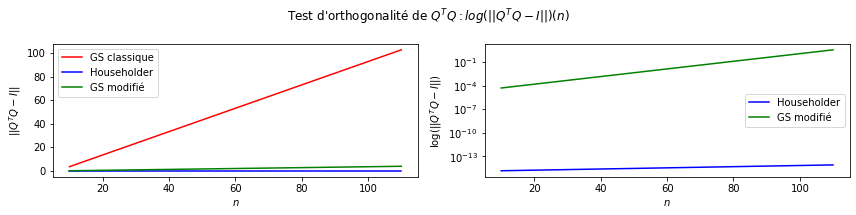

In [23]:
import matplotlib.pyplot as plt
from scipy.linalg import hilbert
ortho =[]
orthos = []
orthoh = []

diagR = []
diagRs = []
diagRh = []

x = np.arange(10, 200,100)
for n in x:
    H = hilbert(n)
    Q, R = GramSchmidt(H)
    Qs,Rs = ModifiedGramSchmidt(H)
    Qh, Rh = np.linalg.qr(H)
    ortho.append(np.linalg.norm(np.dot(Q.T,Q)-np.eye(n)))
    orthos.append(np.linalg.norm(np.dot(Qs.T,Qs)-np.eye(n)))
    orthoh.append(np.linalg.norm(np.dot(Qh.T,Qh)-np.eye(n)))
    diagR.append(np.diag(R))
    diagR.append(np.diag(Rs))
    diagR.append(np.diag(Rh))



fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(x,ortho,'r',label='GS classique')
axs[0].plot(x,orthoh,'b',label='Householder')
axs[0].plot(x,orthos,'g',label='GS modifié')
axs[0].legend()
axs[0].set_xlabel('$n$')
axs[0].set_ylabel('$||Q^TQ-I||$')
plt.tight_layout()

axs[1].semilogy(x,orthoh,'b',label='Householder')
axs[1].semilogy(x,orthos,'g',label='GS modifié')
axs[1].legend()
plt.xlabel('$n$')
plt.ylabel('log($||Q^TQ-I||$)')
plt.suptitle("Test d'orthogonalité de $Q^TQ : log(||Q^TQ-I||)(n)$")
plt.tight_layout()